# Social Media Addiction Analysis - Notebook for Analysis of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\Analytics-Project-Repository\social_media_analysis\cleaned_data.csv")

In [3]:
data.head()

,age,gender,education,country,daily_usage,most_used,affected_academics,sleep_per_night,score,relationship,online_conflicts,addiction_score
0,19,FEMALE,UNDERGRADUATE,BANGLADESH,5.2,INSTAGRAM,YES,6.5,6,RELATIONSHIP,3,8
1,22,MALE,GRADUATE,INDIA,2.1,TWITTER,NO,7.5,8,SINGLE,0,3
2,20,FEMALE,UNDERGRADUATE,USA,6.0,TIKTOK,YES,5.0,5,COMPLICATED,4,9
3,18,MALE,HIGH SCHOOL,UK,3.0,YOUTUBE,NO,7.0,7,SINGLE,1,4
4,21,MALE,GRADUATE,CANADA,4.5,FACEBOOK,YES,6.0,6,RELATIONSHIP,2,7


In [4]:
cat_cols = data.select_dtypes(exclude='number').columns
cat_cols = cat_cols.tolist()+['online_conflicts']
num_cols = ['age','daily_usage','sleep_per_night','score','addiction_score']

## Univariate Analysis

### Categorical Columns

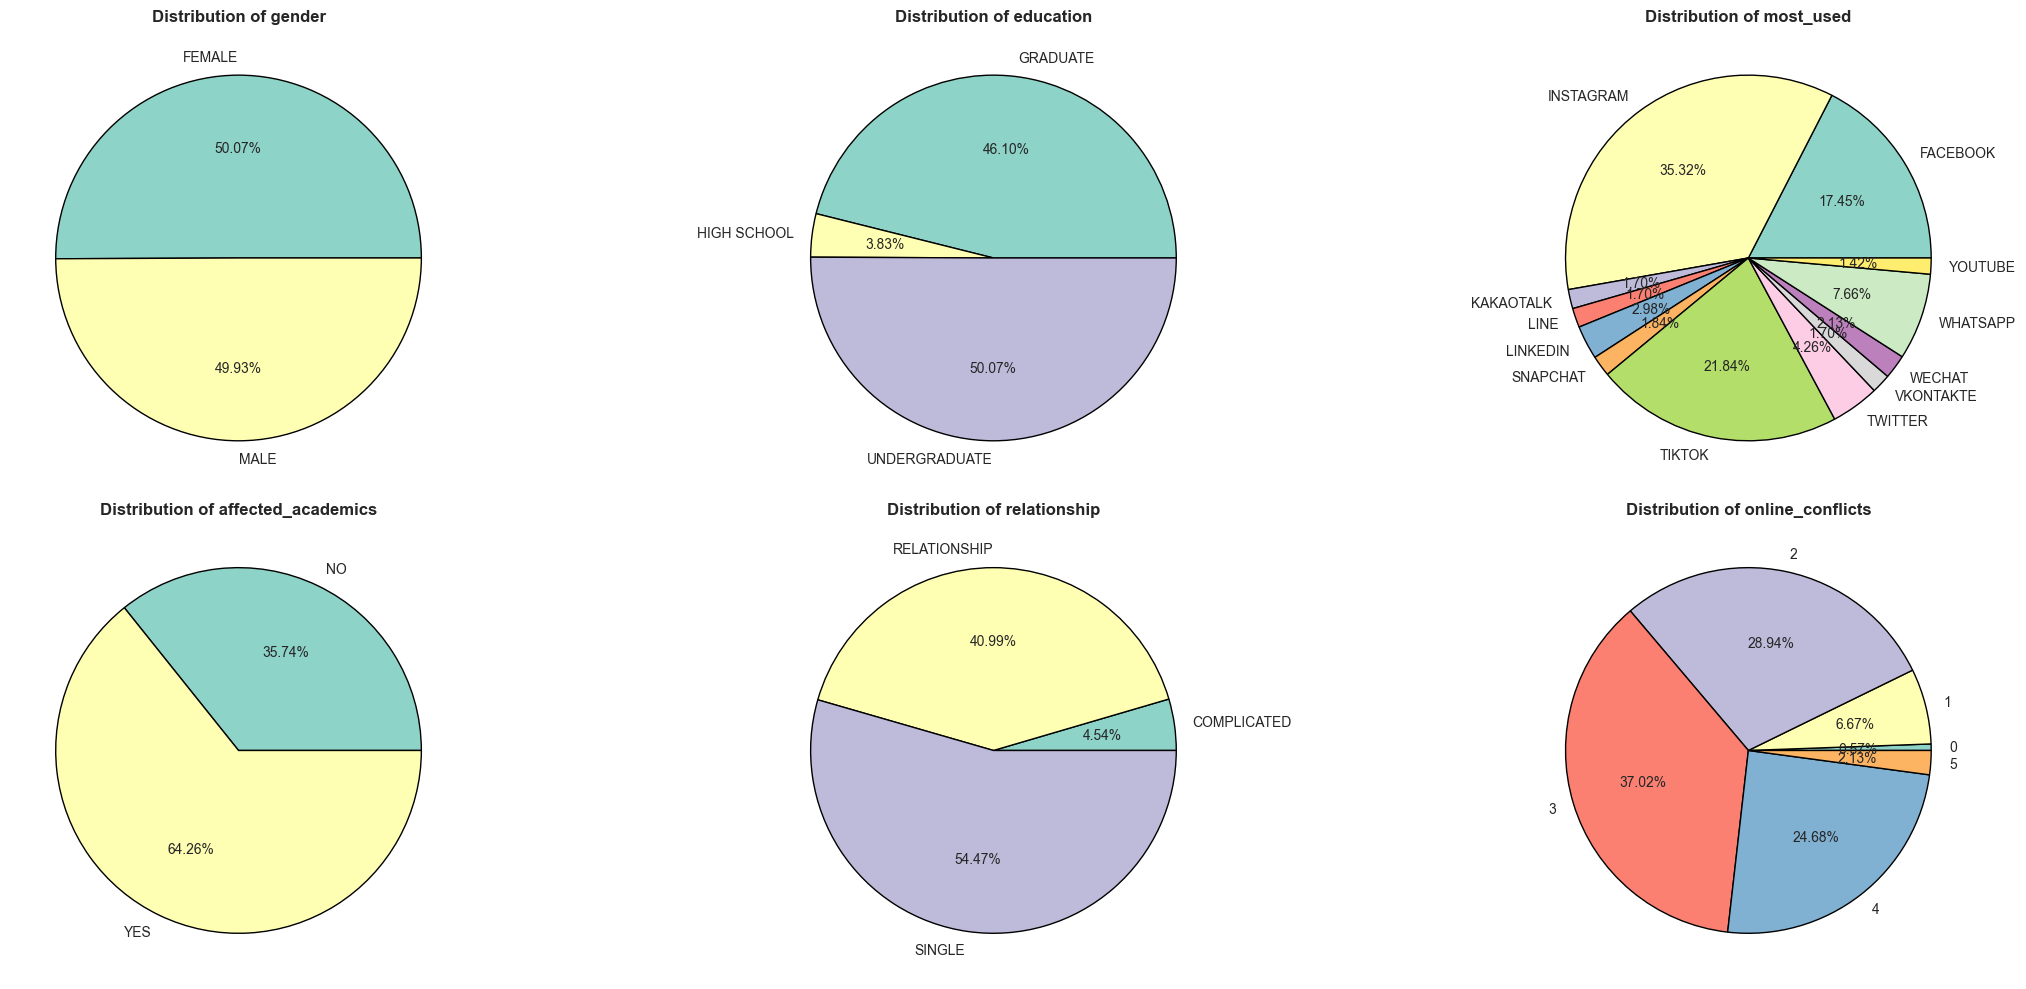

In [5]:
cols = [c for c in cat_cols if c != 'country']

fig, axes = plt.subplots(2, 3, figsize=(24,10))
axes = axes.flatten()

for i, col in enumerate(cols):
    temp = (
        data.groupby(col).size()
            .div(len(data))
            .mul(100)
            .round(2)
            .reset_index(name='percentage')
    )

    axes[i].pie(
        x=temp['percentage'],
        labels=temp[col].tolist(),
        autopct='%.2f%%',
        colors=plt.cm.Set3.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f"Distribution of {col}", fontweight='bold')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()


### Numerical Analysis

In [6]:
data.describe()

,age,daily_usage,sleep_per_night,score,online_conflicts,addiction_score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


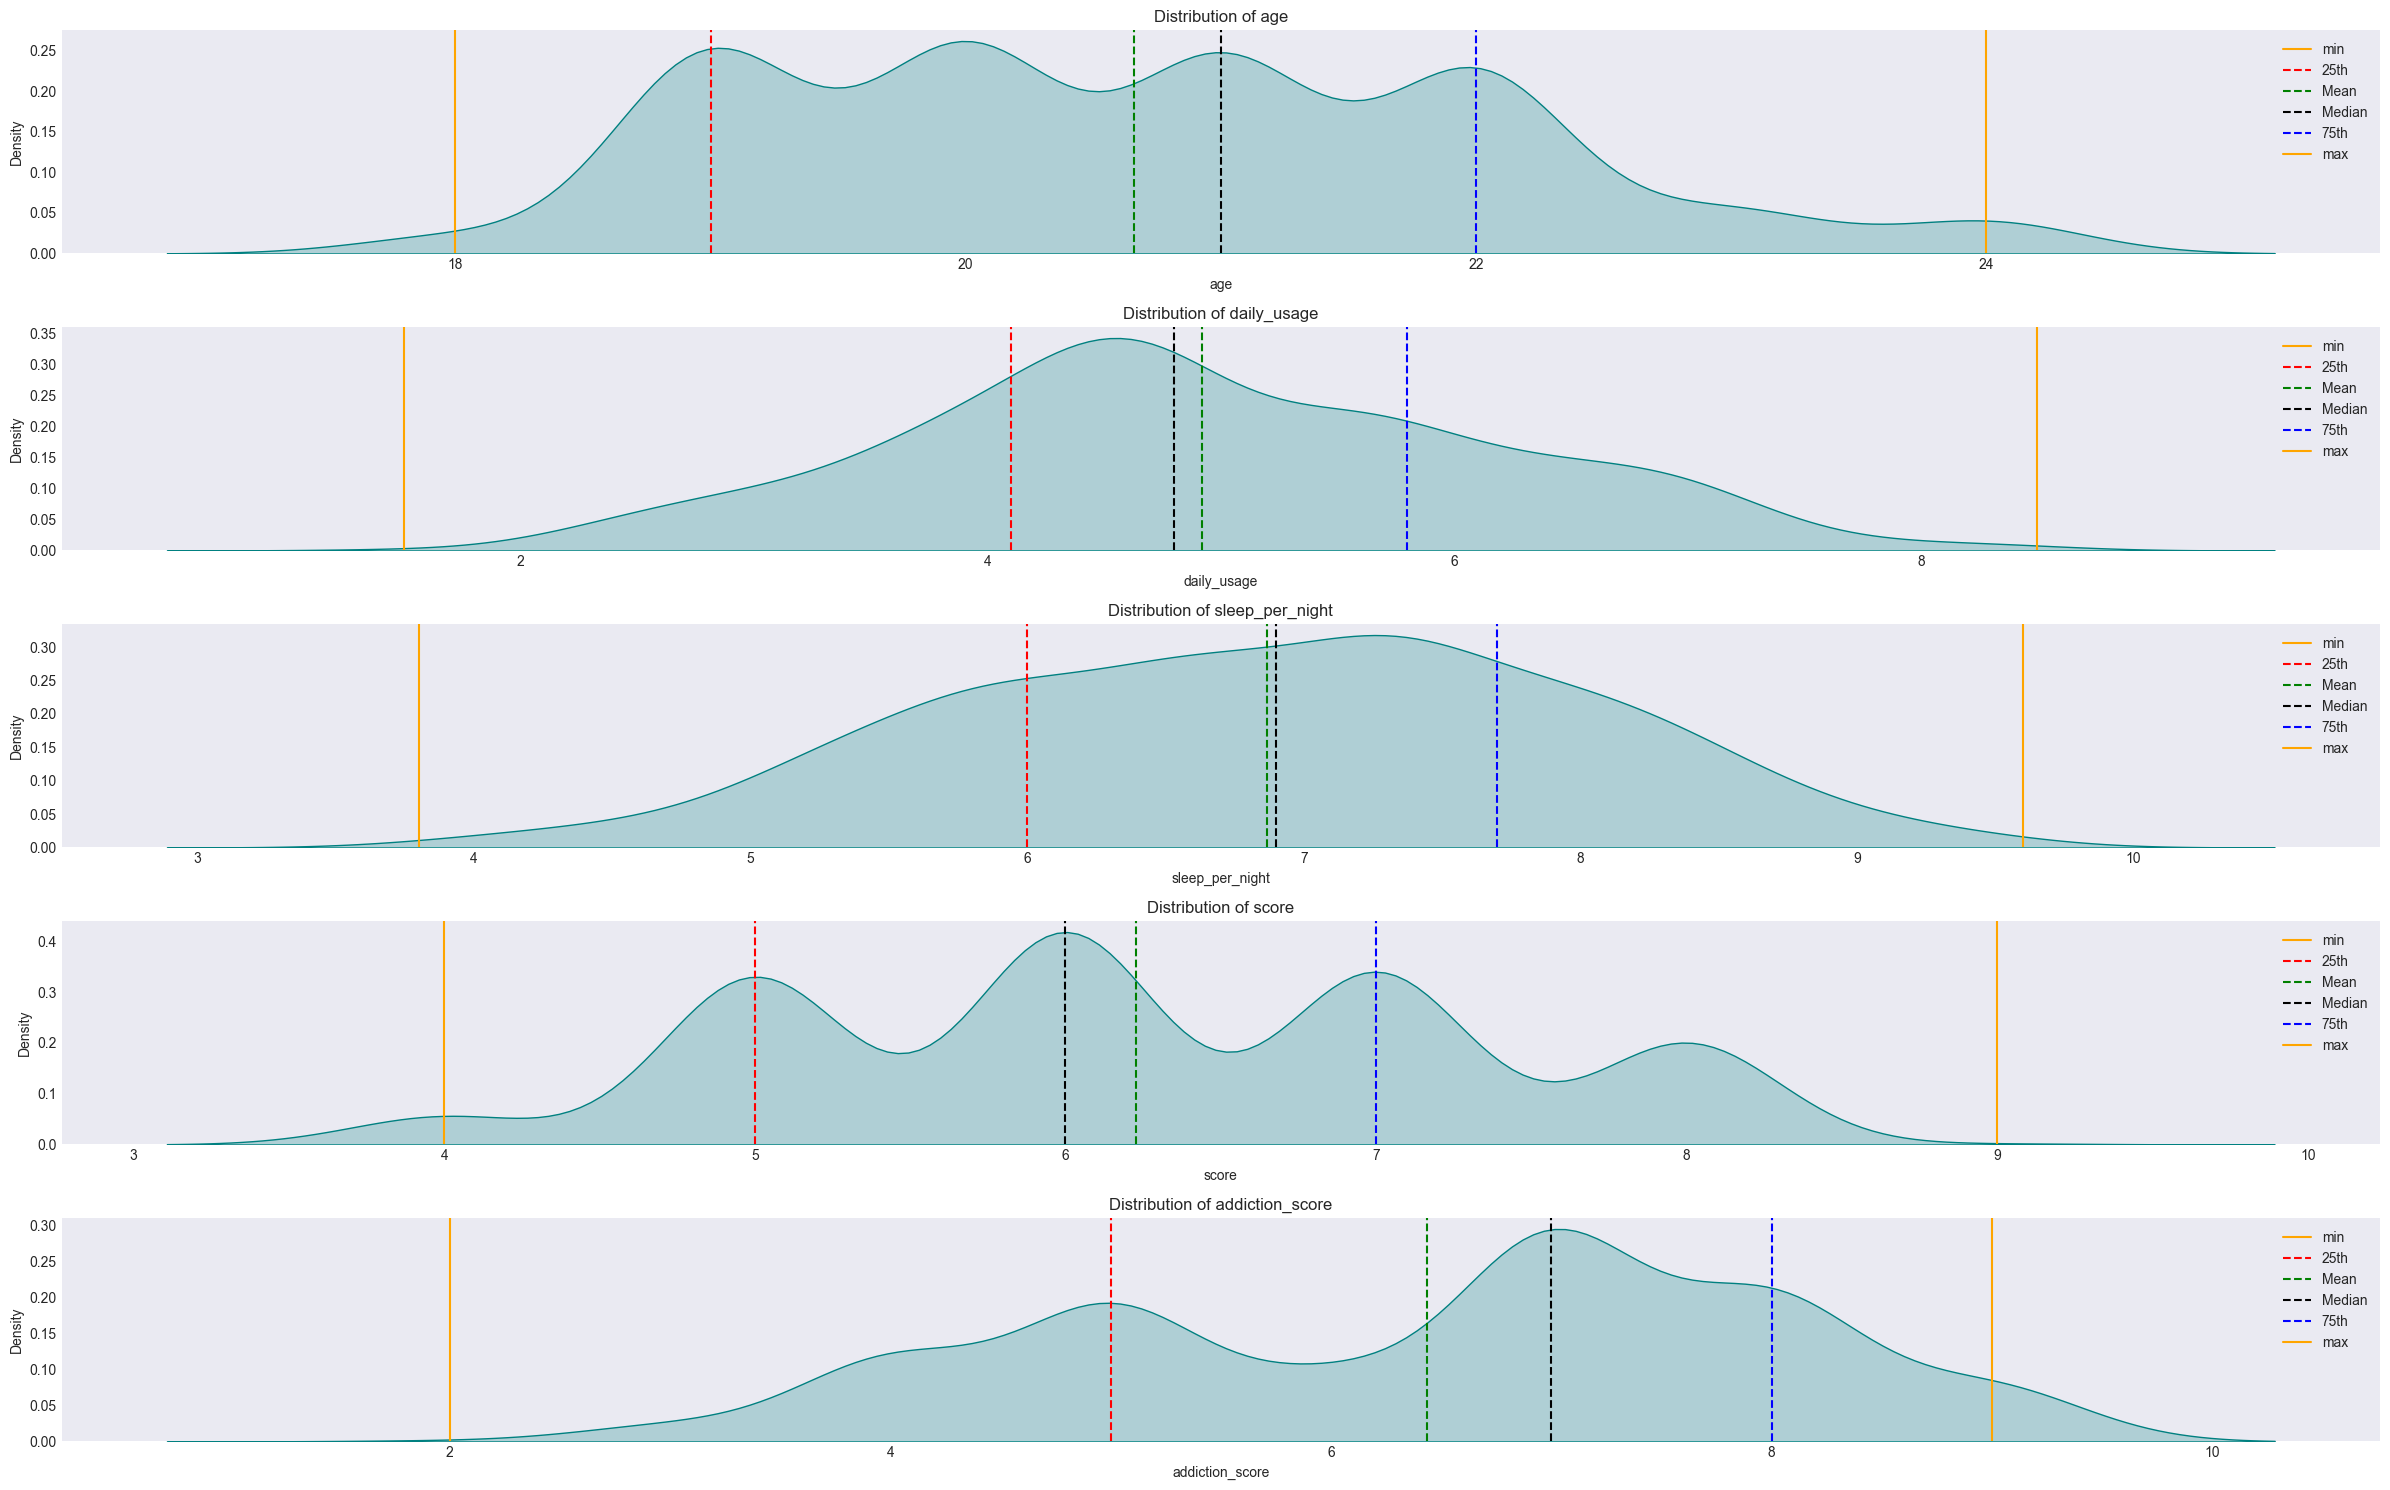

In [10]:
figure , axes = plt.subplots(5,1,figsize=(24,15))
axes = axes.flatten()
for i,col in enumerate(num_cols):
    sns.kdeplot(data[col],fill=True,color='teal',ax = axes[i])
    axes[i].axvline(data[col].min(),linestyle = '-',label = 'min',color = 'orange')
    axes[i].axvline(data[col].quantile(.25),linestyle = '--',label = '25th',color = 'red')
    axes[i].axvline(data[col].mean(),linestyle = '--',label = 'Mean',color = 'green')
    axes[i].axvline(data[col].median(),linestyle = '--',label = 'Median',color = 'black')
    axes[i].axvline(data[col].quantile(.75),linestyle = '--',label = '75th',color = 'blue')
    axes[i].axvline(data[col].max(),linestyle = '-',label = 'max',color = 'orange')
    axes[i].legend()
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


`THERE ARE SOME COLUMNS THAT NEEDS TO BE TREATED AS CATEGORICAL, INSPITE OF HAVING NUMERICAL VALUE`

## Bivariate Analysis

### Categorical with Score

In [11]:
cat_cols

['gender',
 'education',
 'country',
 'most_used',
 'affected_academics',
 'relationship',
 'online_conflicts']

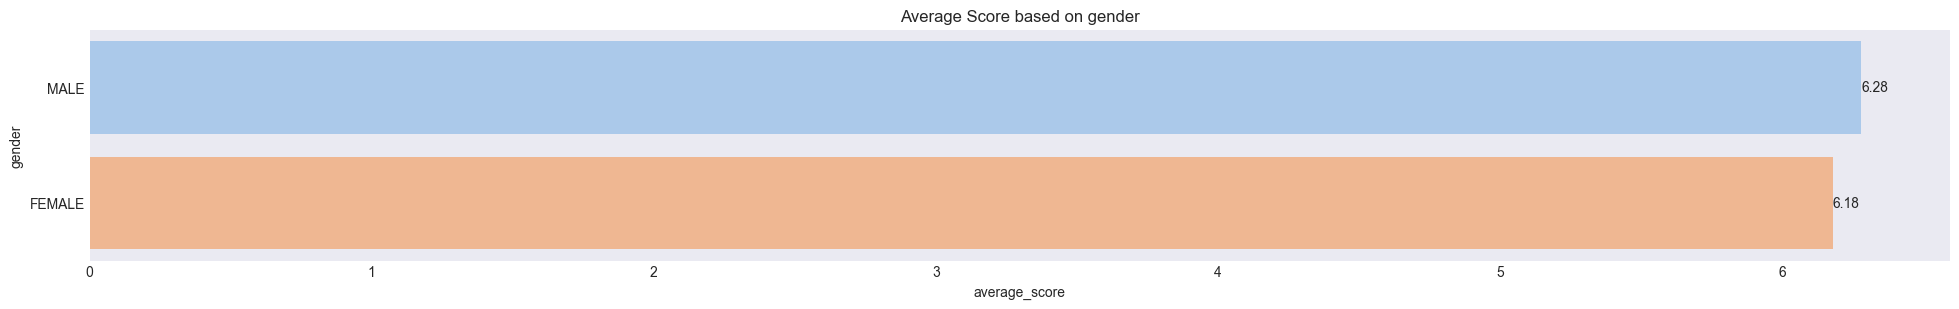

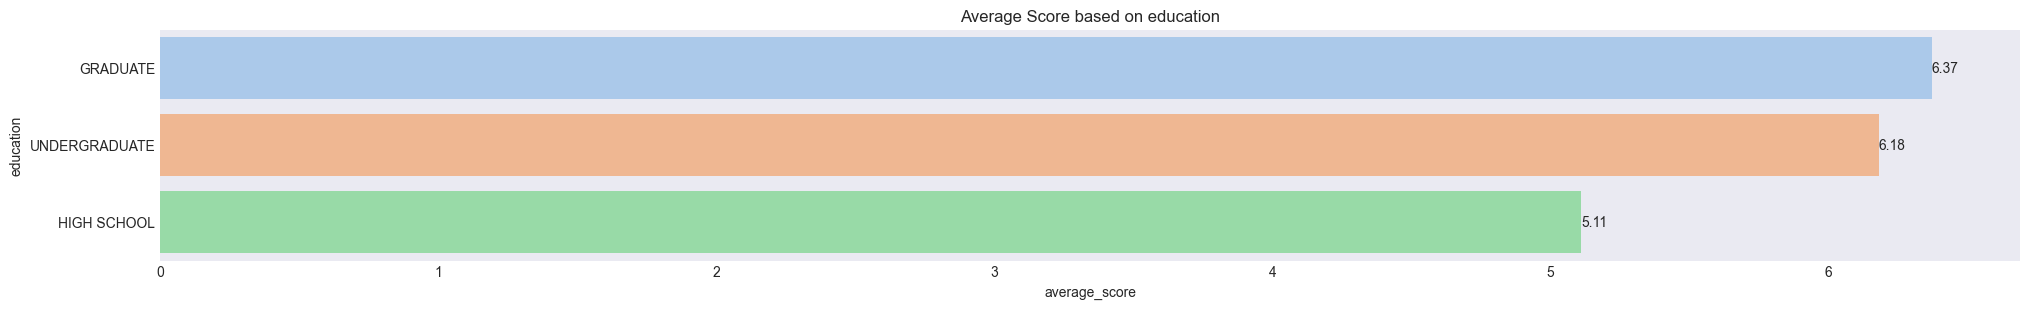

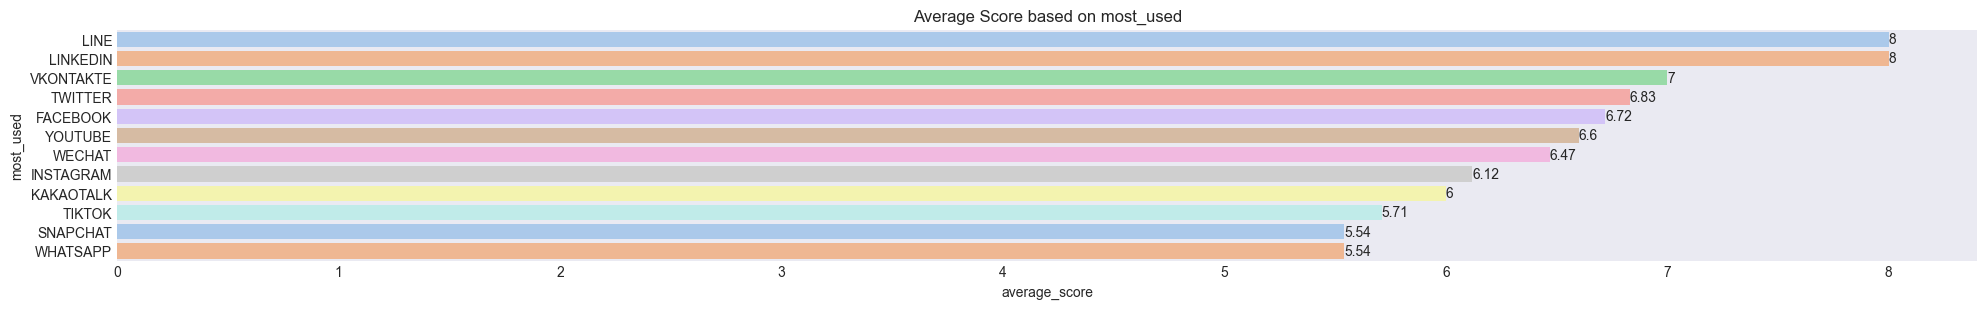

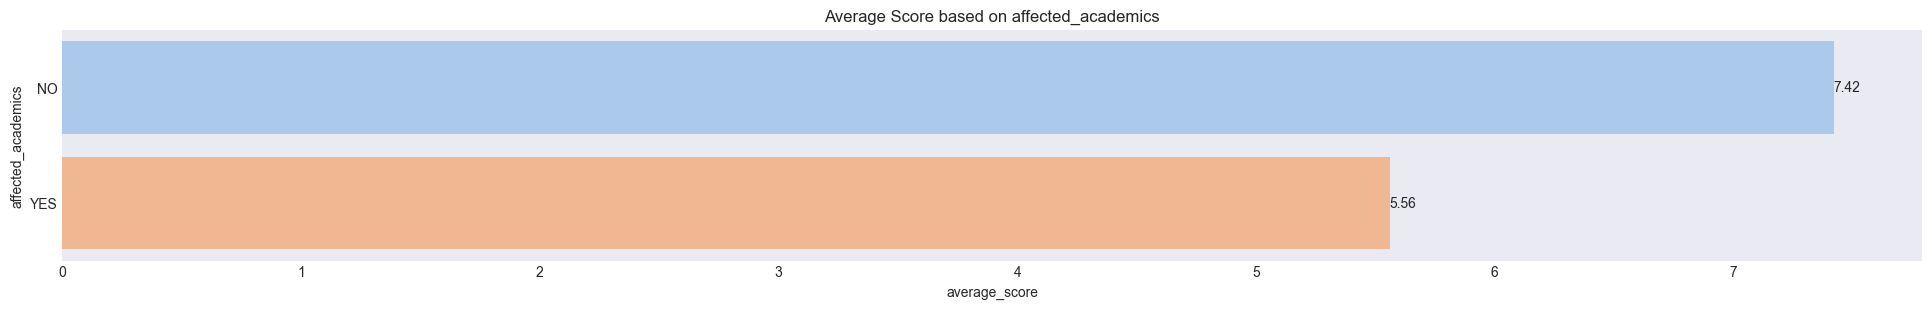

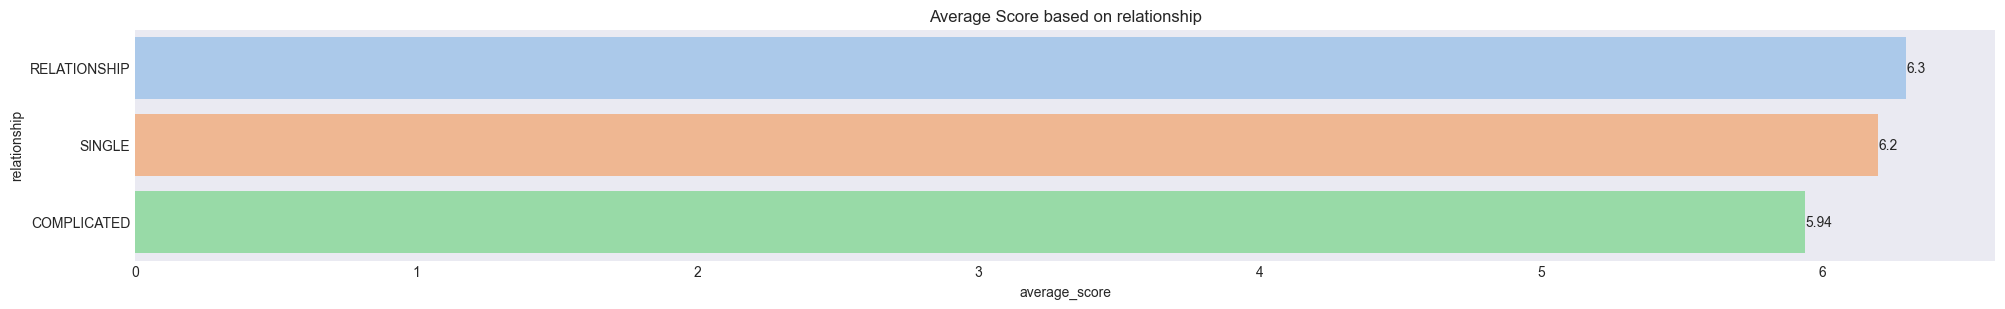

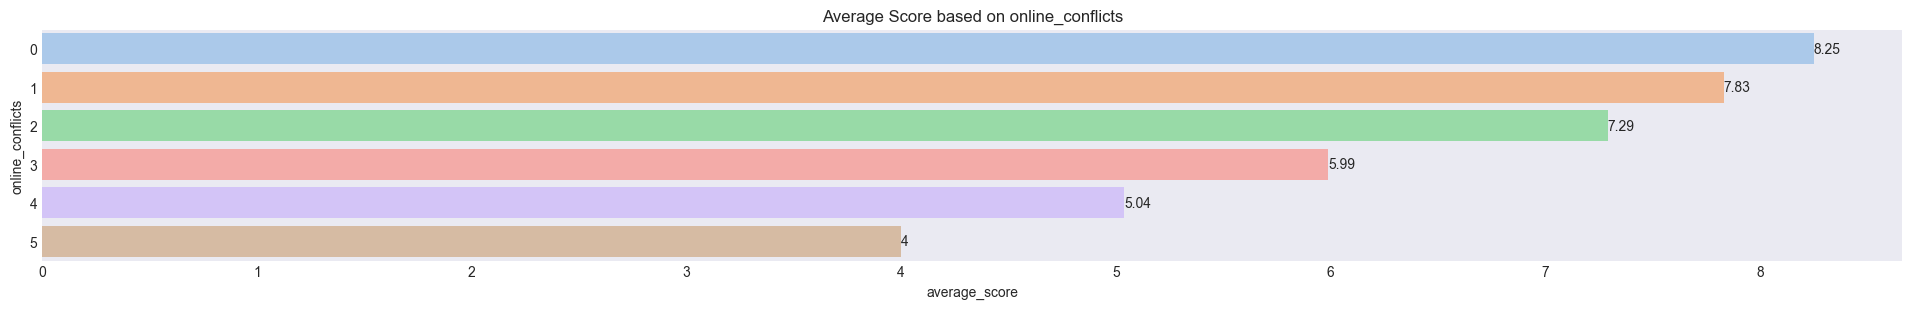

In [17]:
for col in [c for c in cat_cols if c != 'country']:
    temp = data.groupby(col)['score'].mean().reset_index(name = 'average_score').round(2).sort_values(by = 'average_score',ascending=False)
    plt.figure(figsize=(24,3))
    ax = sns.barplot(y = col,x = 'average_score',data = temp, palette= 'pastel',orient='h')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Average Score based on {col}')
    plt.show()

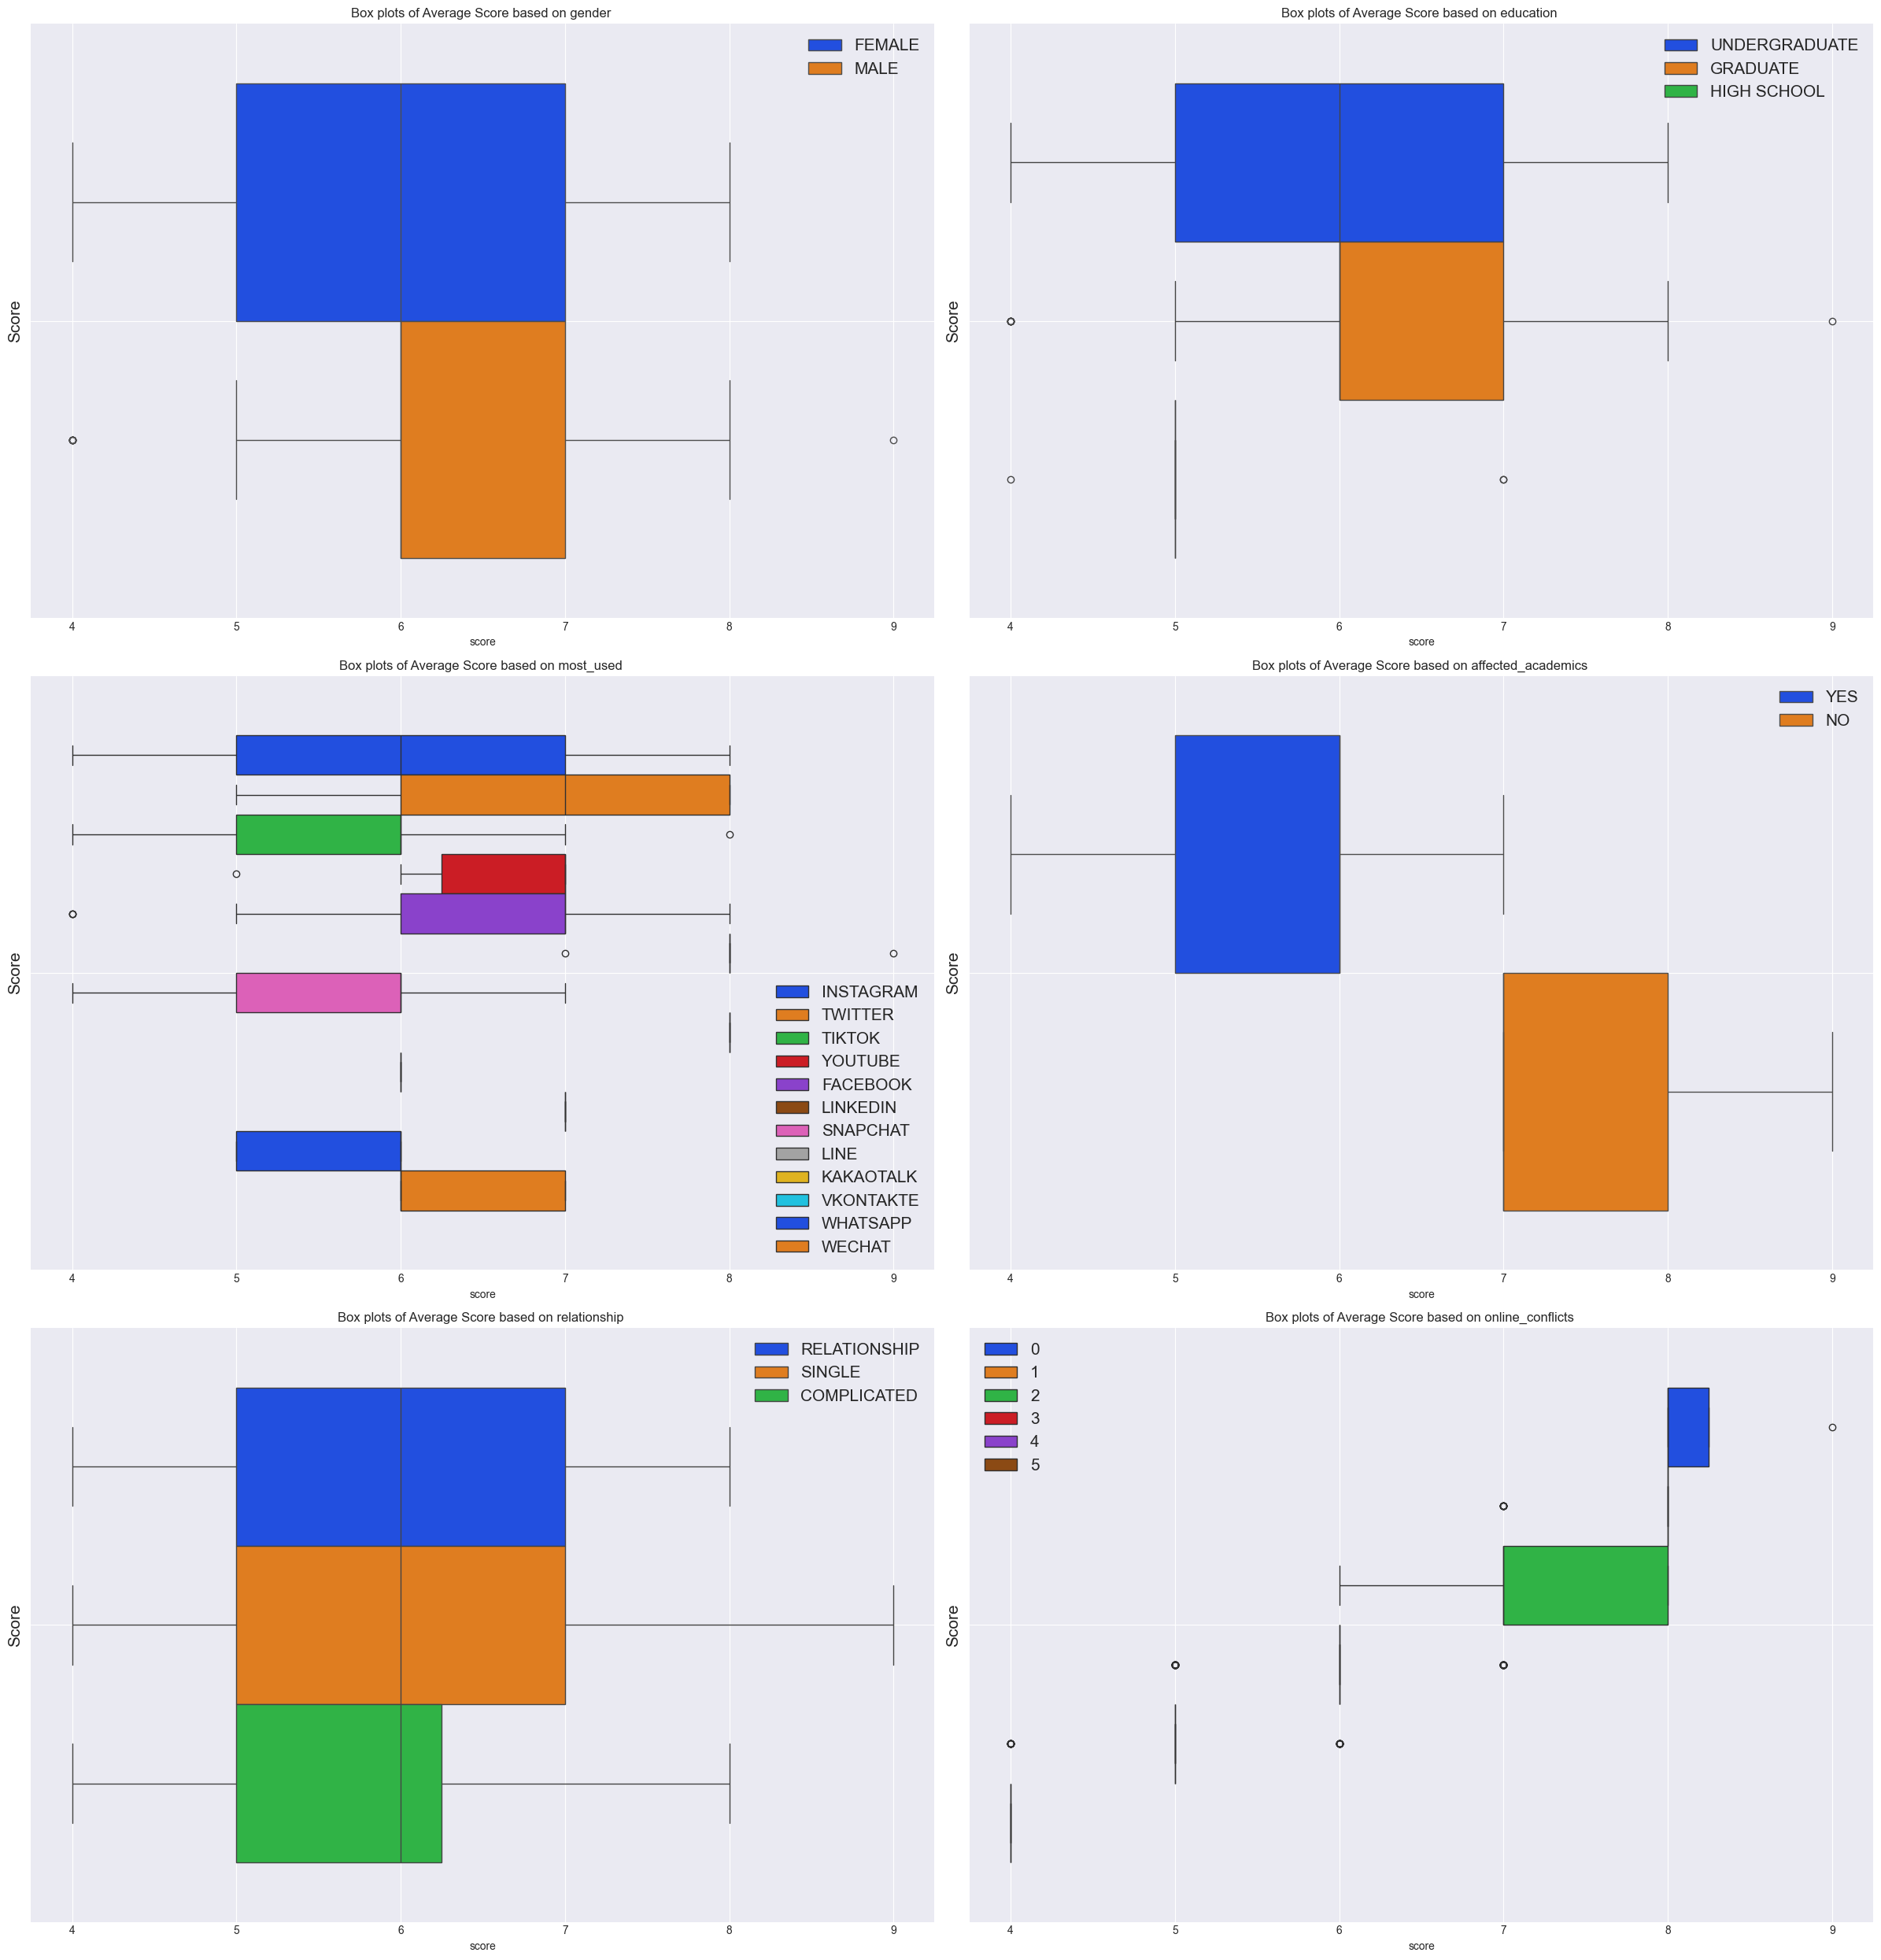

In [44]:
fig , axes = plt.subplots(3,2,figsize=(24,25))
axes = axes.flatten()
for i,col in enumerate([c for c in cat_cols if c != 'country']):
    sns.boxplot(x= 'score',data = data,hue=col,palette='bright',ax=axes[i])
    axes[i].grid(alpha = 1)
    axes[i].legend(fontsize = 15)
    axes[i].set_ylabel('Score',fontsize = 15)
    axes[i].set_title(f'Box plots of Average Score based on {col} ')
plt.tight_layout()
plt.show()

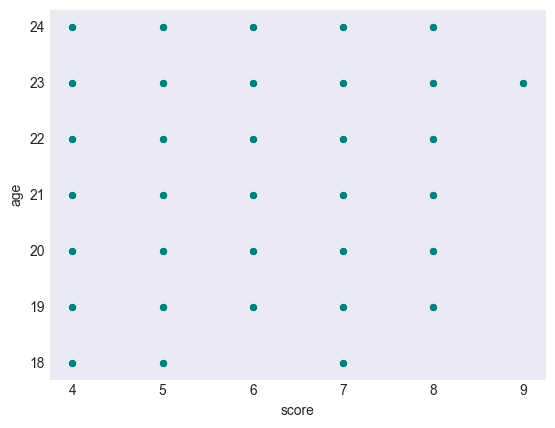

In [45]:
sns.scatterplot(x = 'score', y ='age', data = data,color = 'teal')
plt.show()

<Axes: xlabel='age', ylabel='score'>

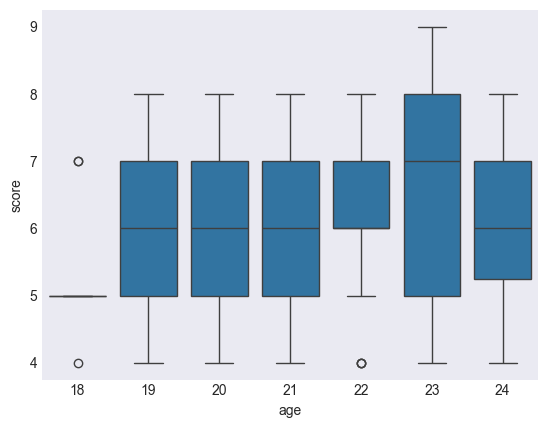

In [49]:
sns.boxplot(x='age', y='score', data=data)
